In [5]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv('TDI_categories.csv')
df.head()

,Country,All,Males,Females,Mean age,Daily,4 to 6 days per week,2 to 3 days per week,Once a week or less,Not used in the last 30 days,...,Regularly employed,Student,Unemployed / discouraged,Receiving social benefits / pensioners / house-makers / disable,Never went to school / never completed primary school (ISCED 0),Primary level of education (ISCED 1),Secondary level of education (ISCED 2 and ISCED 3),Higher education (ISCED 4 to ISCED 6),young adults (Upto 34),adults (greater than 34)
0,Austria,4709,3652,1057,32,1055,415,226,422,1712,...,1309,141,1787,251,151,94,4103,101,3070,1632
1,Belgium,12144,9264,2772,34,5119,948,1279,1092,1717,...,3006,1071,2302,3848,269,2693,5968,1013,6249,5736
2,Bulgaria,1879,1528,351,33,650,259,470,276,154,...,374,70,858,123,79,695,963,129,541,539
3,Croatia,2315,1837,478,39,353,180,984,157,1401,...,661,195,684,135,31,513,1564,137,710,1605
4,Cyprus,884,767,117,30,357,86,99,105,212,...,270,90,358,19,16,305,373,165,590,291


In [9]:
# Create new columns by aggregating and summing the specified columns
df['GENDER'] = df[['Males', 'Females']].sum(axis=1)
df['AGE GROUP'] = df[['young adults (Upto 34)', 'adults (greater than 34)']].sum(axis=1)
df['FREQUENCY OF USE'] = df[['Daily', '4 to 6 days per week', '2 to 3 days per week', 'Once a week or less', 'Not used in the last 30 days']].sum(axis=1) 
df['ROUTE OF ADMINISTRATION']=df[['Inject', 'Smoke / inhale', 'Eat / drink', 'Sniff']].sum(axis=1)
df['EMPLOYMENT STATUS'] = df[['Occasionally employed', 'Regularly employed', 'Student', 'Unemployed / discouraged', 'Receiving social benefits / pensioners / house-makers / disable']].sum(axis=1)
df['LEVEL OF EDUCATION'] = df[['Never went to school / never completed primary school (ISCED 0)', 'Primary level of education (ISCED 1)', 'Secondary level of education (ISCED 2 and ISCED 3)', 'Higher education (ISCED 4 to ISCED 6)']].sum(axis=1)

# Display the updated dataframe
df.head()

,Country,All,Males,Females,Mean age,Daily,4 to 6 days per week,2 to 3 days per week,Once a week or less,Not used in the last 30 days,...,Secondary level of education (ISCED 2 and ISCED 3),Higher education (ISCED 4 to ISCED 6),young adults (Upto 34),adults (greater than 34),GENDER,AGE GROUP,FREQUENCY OF USE,ROUTE OF ADMINISTRATION,EMPLOYMENT STATUS,LEVEL OF EDUCATION
0,Austria,4709,3652,1057,32,1055,415,226,422,1712,...,4103,101,3070,1632,4709,4702,3830,3634,3546,4449
1,Belgium,12144,9264,2772,34,5119,948,1279,1092,1717,...,5968,1013,6249,5736,12036,11985,10155,9671,10648,9943
2,Bulgaria,1879,1528,351,33,650,259,470,276,154,...,963,129,541,539,1879,1080,1809,1755,1850,1866
3,Croatia,2315,1837,478,39,353,180,984,157,1401,...,1564,137,710,1605,2315,2315,3075,2230,2099,2245
4,Cyprus,884,767,117,30,357,86,99,105,212,...,373,165,590,291,884,881,859,874,842,859


In [11]:
df.to_csv('TDI_categories_aggregated.csv', index=False)

In [12]:
data = pd.read_csv('TDI_categories_aggregated.csv')

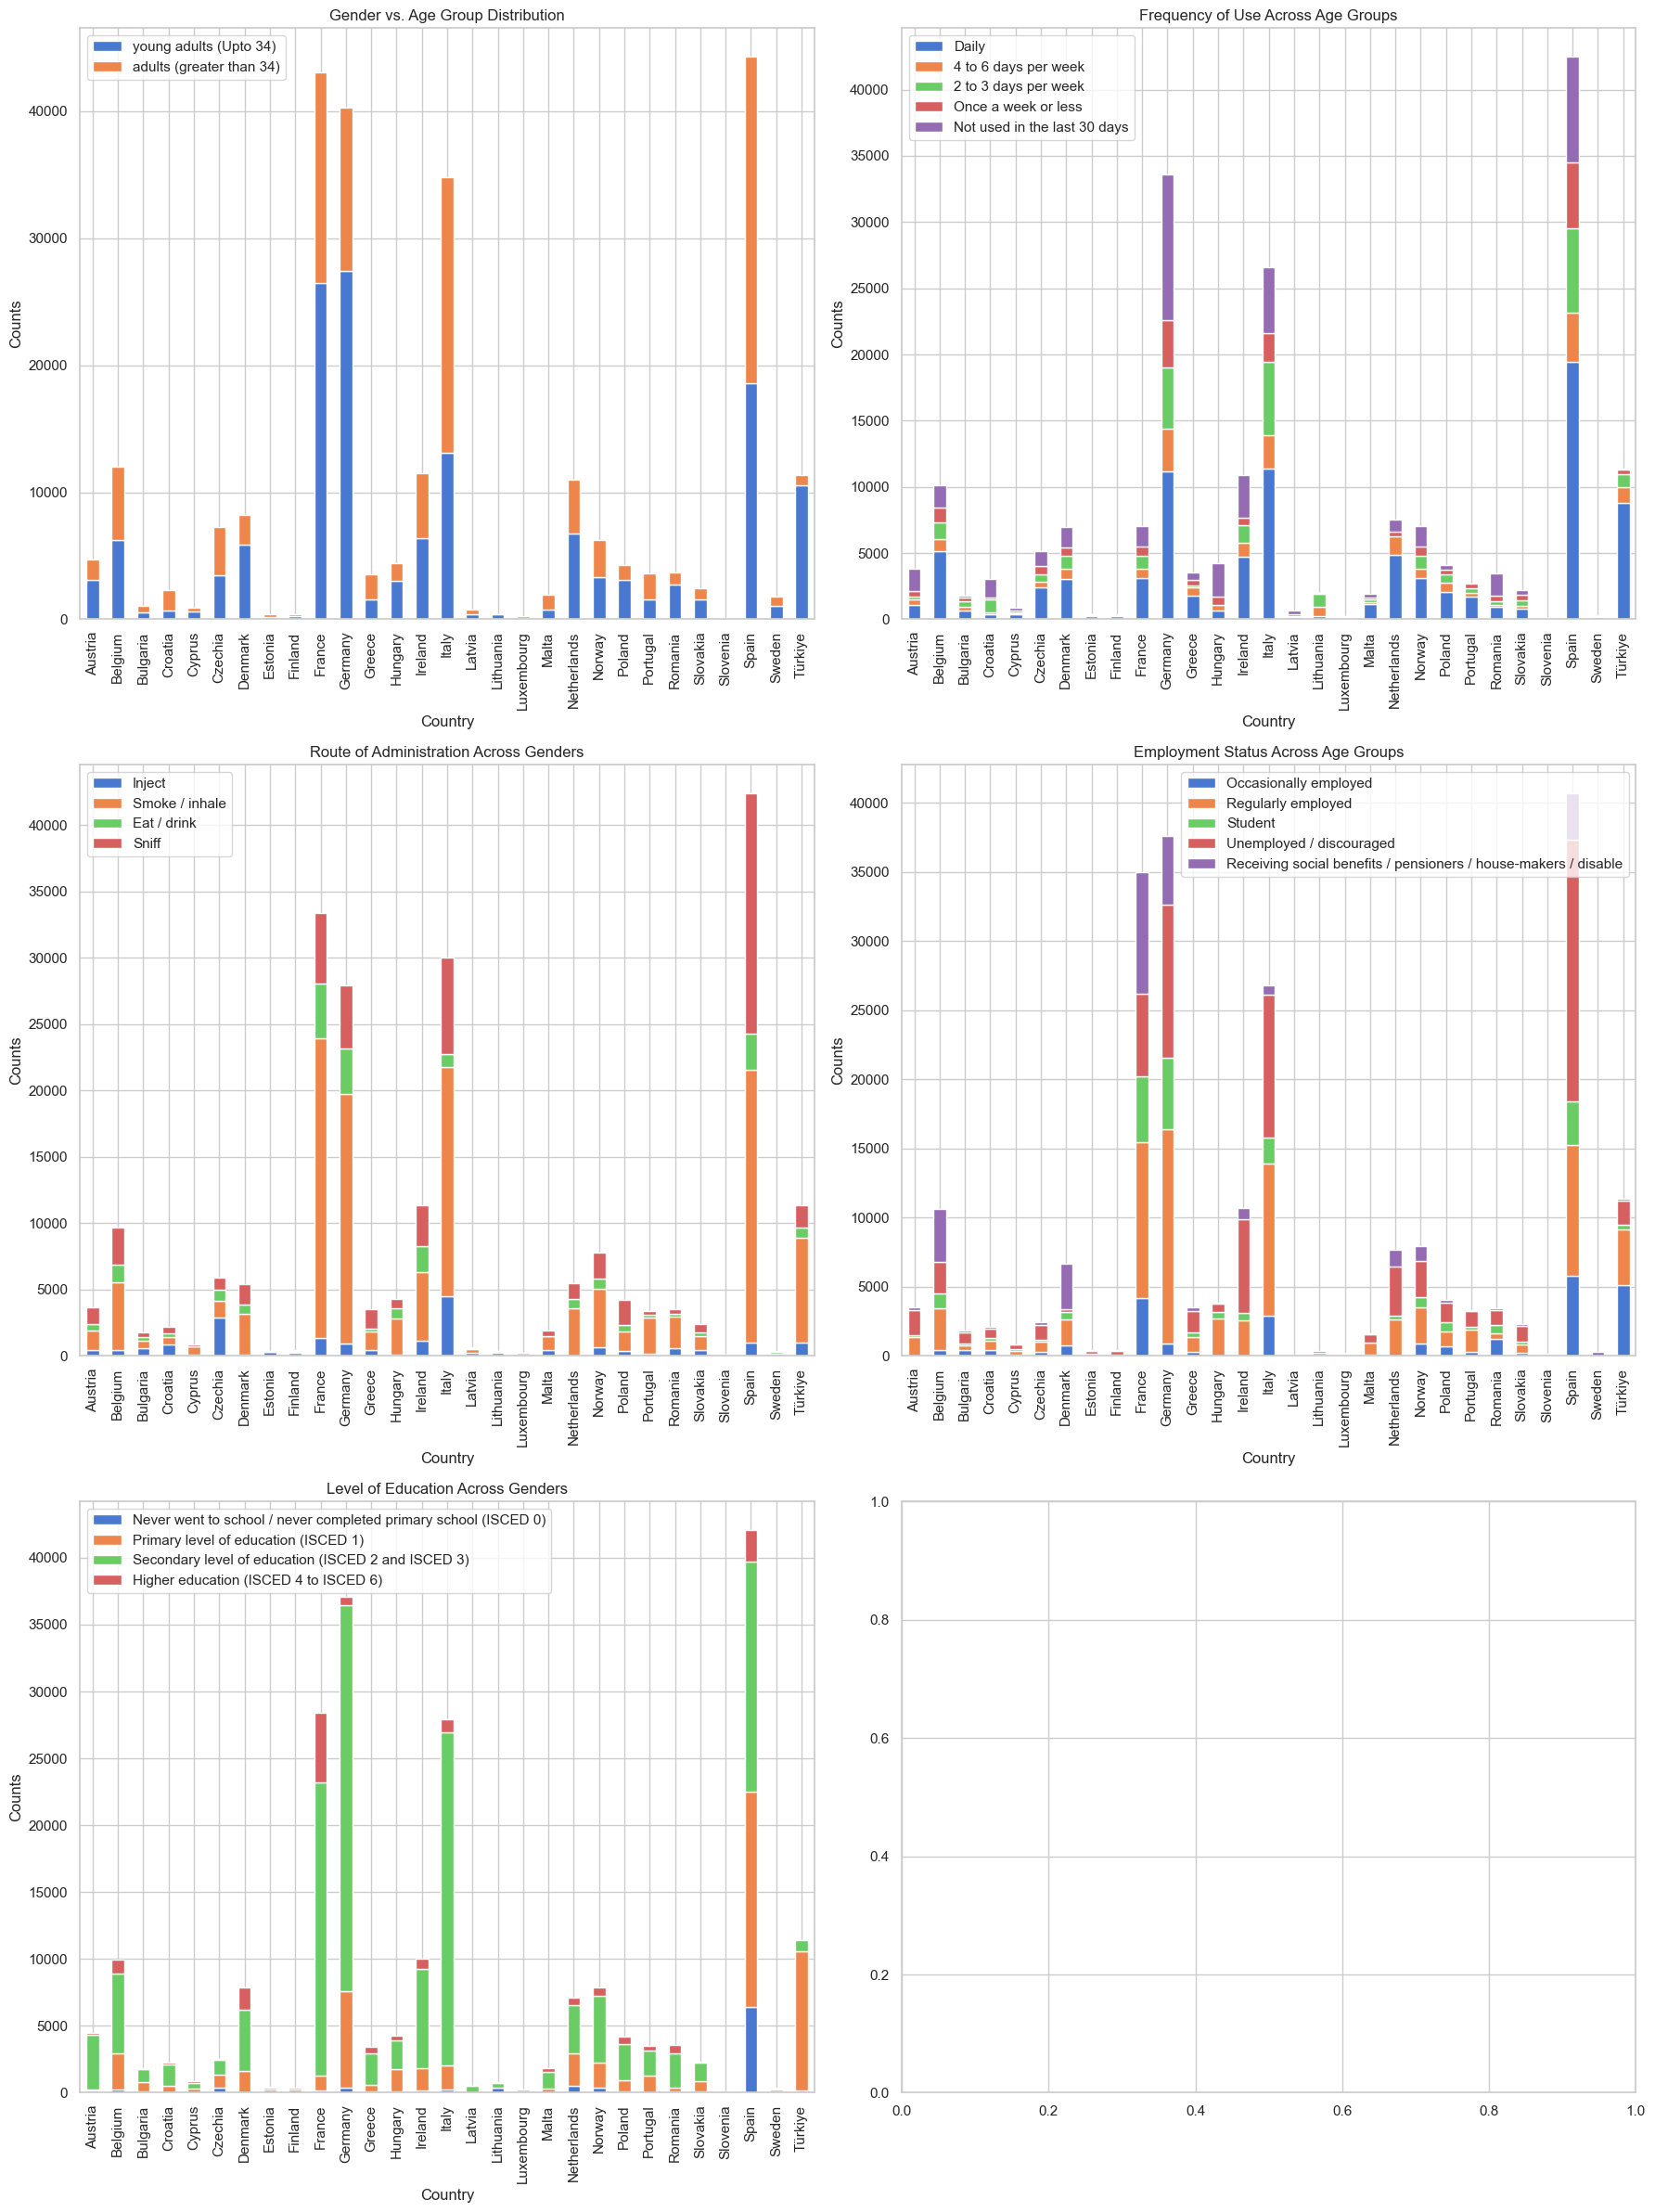

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the visual style
sns.set(style="whitegrid", palette="muted")
fig, axs = plt.subplots(3, 2, figsize=(18, 24))

# Gender vs. Age Group Distribution
gender_age_data = data[['Country', 'young adults (Upto 34)', 'adults (greater than 34)']].set_index('Country')
gender_age_data.plot(kind='bar', stacked=True, ax=axs[0, 0])
axs[0, 0].set_title('Gender vs. Age Group Distribution')
axs[0, 0].set_ylabel('Counts')
axs[0, 0].set_xlabel('Country')

# Frequency of Use Across Age Groups
freq_use_data = data[['Country', 'Daily', '4 to 6 days per week', '2 to 3 days per week', 
                      'Once a week or less', 'Not used in the last 30 days']].set_index('Country')
freq_use_data.plot(kind='bar', stacked=True, ax=axs[0, 1])
axs[0, 1].set_title('Frequency of Use Across Age Groups')
axs[0, 1].set_ylabel('Counts')
axs[0, 1].set_xlabel('Country')

# Route of Administration Across Genders
route_admin_data = data[['Country', 'Inject', 'Smoke / inhale', 'Eat / drink', 'Sniff']].set_index('Country')
route_admin_data.plot(kind='bar', stacked=True, ax=axs[1, 0])
axs[1, 0].set_title('Route of Administration Across Genders')
axs[1, 0].set_ylabel('Counts')
axs[1, 0].set_xlabel('Country')

# Employment Status Across Age Groups
employment_status_data = data[['Country', 'Occasionally employed', 'Regularly employed', 'Student', 
                                'Unemployed / discouraged', 'Receiving social benefits / pensioners / house-makers / disable']].set_index('Country')
employment_status_data.plot(kind='bar', stacked=True, ax=axs[1, 1])
axs[1, 1].set_title('Employment Status Across Age Groups')
axs[1, 1].set_ylabel('Counts')
axs[1, 1].set_xlabel('Country')

# Level of Education Across Genders
education_level_data = data[['Country', 'Never went to school / never completed primary school (ISCED 0)', 
                              'Primary level of education (ISCED 1)', 
                              'Secondary level of education (ISCED 2 and ISCED 3)', 
                              'Higher education (ISCED 4 to ISCED 6)']].set_index('Country')
education_level_data.plot(kind='bar', stacked=True, ax=axs[2, 0])
axs[2, 0].set_title('Level of Education Across Genders')
axs[2, 0].set_ylabel('Counts')
axs[2, 0].set_xlabel('Country')

# Adjust layout and show the plots
fig.tight_layout()
plt.show()
